<a href="https://colab.research.google.com/github/JJay1010/K-software_-/blob/main/%EA%B0%95%EC%9D%80%EC%A3%BC/230207_commit_efficientNetB0_224_Ab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 44.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.9/178.9 KB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 17.6 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=aed298b3b0a471c8e7ce2eafa9ca963a5e9e34e7f1d0bf5ba4a596a7ef5d65fd
  Stored in directory: /root/.cache/pip/wheels/4c/8e/7e/72fbc243e1aeecae64a96875432e70d4e92f3d2d18123be004
Successfully built pathtools
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras import applications
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
def efficientNet_all_frz_model():
  base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False, weights = 'imagenet')
  base_model.trainable = False
  flat_layer = layers.GlobalAveragePooling2D()(base_model.output)
  output = layers.Dense(1, activation = 'sigmoid')(flat_layer)
  model = tf.keras.models.Model(base_model.input, output)
  return model


In [ ]:
model = efficientNet_all_frz_model()

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                            

In [ ]:
# Compile the model using an optimizer, a loss function, and evaluation metrics

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
import numpy as np

x_data = np.load('/content/drive/MyDrive/team_project/abdominal_data/dog/data_224/Ab06_x_data.npy')
y_data = np.load('/content/drive/MyDrive/team_project/abdominal_data/dog/data_224/Ab06_y_data.npy')

In [ ]:
x_data.shape

(9477, 224, 224, 3)

In [ ]:
y_data.shape

(9477,)

In [ ]:
# Split your data into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5)


In [ ]:
np.unique(y_train,return_counts = True)

(array([0, 1], dtype=int32), array([7472,  109]))

In [ ]:
del x_data

In [ ]:
del y_data

In [ ]:
# Create a tf.data.Dataset for your training data

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=len(x_train)).batch(32)


In [ ]:
# initialize wandb
import wandb

wandb.init(project='dog-Ab06-efficientNet-224')


ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: jjay1010. Use `wandb login --relogin` to force relogin


In [ ]:
# Train the model using fit and the training Dataset:
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint

history = model.fit(train_dataset.repeat(), epochs=30, steps_per_epoch=len(x_train)//32, callbacks=[
                      WandbMetricsLogger(log_freq=5),
                      WandbModelCheckpoint("models")
                    ])

Epoch 1/30
236/236 [==============================] - ETA: 0s - loss: 0.1956 - accuracy: 0.9762

wandb: Adding directory to artifact (./models)... Done. 0.1s


236/236 [==============================] - 63s 202ms/step - loss: 0.1956 - accuracy: 0.9762
Epoch 2/30
236/236 [==============================] - ETA: 0s - loss: 0.0824 - accuracy: 0.9856

wandb: Adding directory to artifact (./models)... Done. 0.1s


236/236 [==============================] - 50s 211ms/step - loss: 0.0824 - accuracy: 0.9856
Epoch 3/30
236/236 [==============================] - ETA: 0s - loss: 0.0760 - accuracy: 0.9857

wandb: Adding directory to artifact (./models)... Done. 0.1s


236/236 [==============================] - 49s 209ms/step - loss: 0.0760 - accuracy: 0.9857
Epoch 4/30
236/236 [==============================] - ETA: 0s - loss: 0.0753 - accuracy: 0.9854

wandb: Adding directory to artifact (./models)... Done. 0.1s


236/236 [==============================] - 48s 202ms/step - loss: 0.0753 - accuracy: 0.9854
Epoch 5/30
236/236 [==============================] - ETA: 0s - loss: 0.0738 - accuracy: 0.9856

wandb: Adding directory to artifact (./models)... Done. 0.1s


236/236 [==============================] - 47s 200ms/step - loss: 0.0738 - accuracy: 0.9856
Epoch 6/30
236/236 [==============================] - ETA: 0s - loss: 0.0712 - accuracy: 0.9860

wandb: Adding directory to artifact (./models)... Done. 0.1s


236/236 [==============================] - 47s 199ms/step - loss: 0.0712 - accuracy: 0.9860
Epoch 7/30
236/236 [==============================] - ETA: 0s - loss: 0.0733 - accuracy: 0.9853

wandb: Adding directory to artifact (./models)... Done. 0.1s


236/236 [==============================] - 50s 211ms/step - loss: 0.0733 - accuracy: 0.9853
Epoch 8/30
236/236 [==============================] - ETA: 0s - loss: 0.0685 - accuracy: 0.9861

wandb: Adding directory to artifact (./models)... Done. 0.1s


236/236 [==============================] - 49s 208ms/step - loss: 0.0685 - accuracy: 0.9861
Epoch 9/30
236/236 [==============================] - ETA: 0s - loss: 0.0716 - accuracy: 0.9850

wandb: Adding directory to artifact (./models)... Done. 0.1s


236/236 [==============================] - 48s 202ms/step - loss: 0.0716 - accuracy: 0.9850
Epoch 10/30
236/236 [==============================] - ETA: 0s - loss: 0.0659 - accuracy: 0.9862

wandb: Adding directory to artifact (./models)... Done. 0.1s


236/236 [==============================] - 50s 211ms/step - loss: 0.0659 - accuracy: 0.9862
Epoch 11/30
236/236 [==============================] - ETA: 0s - loss: 0.0702 - accuracy: 0.9849

wandb: Adding directory to artifact (./models)... Done. 0.1s


236/236 [==============================] - 49s 206ms/step - loss: 0.0702 - accuracy: 0.9849
Epoch 12/30
236/236 [==============================] - ETA: 0s - loss: 0.0648 - accuracy: 0.9862

wandb: Adding directory to artifact (./models)... Done. 0.1s


236/236 [==============================] - 50s 212ms/step - loss: 0.0648 - accuracy: 0.9862
Epoch 13/30
236/236 [==============================] - ETA: 0s - loss: 0.0657 - accuracy: 0.9857

wandb: Adding directory to artifact (./models)... Done. 0.1s


236/236 [==============================] - 49s 209ms/step - loss: 0.0657 - accuracy: 0.9857
Epoch 14/30
236/236 [==============================] - ETA: 0s - loss: 0.0656 - accuracy: 0.9856

wandb: Adding directory to artifact (./models)... Done. 0.1s


236/236 [==============================] - 49s 207ms/step - loss: 0.0656 - accuracy: 0.9856
Epoch 15/30
236/236 [==============================] - ETA: 0s - loss: 0.0668 - accuracy: 0.9849

wandb: Adding directory to artifact (./models)... Done. 0.1s


236/236 [==============================] - 50s 213ms/step - loss: 0.0668 - accuracy: 0.9849
Epoch 16/30
236/236 [==============================] - ETA: 0s - loss: 0.0619 - accuracy: 0.9861

wandb: Adding directory to artifact (./models)... Done. 0.1s


236/236 [==============================] - 50s 213ms/step - loss: 0.0619 - accuracy: 0.9861
Epoch 17/30
236/236 [==============================] - ETA: 0s - loss: 0.0622 - accuracy: 0.9862

wandb: Adding directory to artifact (./models)... Done. 0.1s


236/236 [==============================] - 51s 215ms/step - loss: 0.0622 - accuracy: 0.9862
Epoch 18/30
236/236 [==============================] - ETA: 0s - loss: 0.0612 - accuracy: 0.9860

wandb: Adding directory to artifact (./models)... Done. 0.1s


236/236 [==============================] - 49s 208ms/step - loss: 0.0612 - accuracy: 0.9860
Epoch 19/30
236/236 [==============================] - ETA: 0s - loss: 0.0650 - accuracy: 0.9846

wandb: Adding directory to artifact (./models)... Done. 0.1s


236/236 [==============================] - 48s 204ms/step - loss: 0.0650 - accuracy: 0.9846
Epoch 20/30
236/236 [==============================] - ETA: 0s - loss: 0.0618 - accuracy: 0.9854

wandb: Adding directory to artifact (./models)... Done. 0.1s


236/236 [==============================] - 49s 209ms/step - loss: 0.0618 - accuracy: 0.9854
Epoch 21/30
236/236 [==============================] - ETA: 0s - loss: 0.0560 - accuracy: 0.9868

wandb: Adding directory to artifact (./models)... Done. 0.1s


236/236 [==============================] - 52s 222ms/step - loss: 0.0560 - accuracy: 0.9868
Epoch 22/30
236/236 [==============================] - ETA: 0s - loss: 0.0612 - accuracy: 0.9854

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 52s 219ms/step - loss: 0.0612 - accuracy: 0.9854
Epoch 23/30
236/236 [==============================] - ETA: 0s - loss: 0.0606 - accuracy: 0.9850

wandb: Adding directory to artifact (./models)... Done. 0.1s


236/236 [==============================] - 50s 213ms/step - loss: 0.0606 - accuracy: 0.9850
Epoch 24/30
236/236 [==============================] - ETA: 0s - loss: 0.0571 - accuracy: 0.9860

wandb: Adding directory to artifact (./models)... Done. 0.1s


236/236 [==============================] - 50s 214ms/step - loss: 0.0571 - accuracy: 0.9860
Epoch 25/30
236/236 [==============================] - ETA: 0s - loss: 0.0612 - accuracy: 0.9848

wandb: Adding directory to artifact (./models)... Done. 0.1s


236/236 [==============================] - 47s 201ms/step - loss: 0.0612 - accuracy: 0.9848
Epoch 26/30
236/236 [==============================] - ETA: 0s - loss: 0.0552 - accuracy: 0.9866

wandb: Adding directory to artifact (./models)... Done. 0.1s


236/236 [==============================] - 48s 203ms/step - loss: 0.0552 - accuracy: 0.9866
Epoch 27/30
236/236 [==============================] - ETA: 0s - loss: 0.0584 - accuracy: 0.9848

wandb: Adding directory to artifact (./models)... Done. 0.1s


236/236 [==============================] - 48s 205ms/step - loss: 0.0584 - accuracy: 0.9848
Epoch 28/30
236/236 [==============================] - ETA: 0s - loss: 0.0526 - accuracy: 0.9865

wandb: Adding directory to artifact (./models)... Done. 0.1s


236/236 [==============================] - 48s 203ms/step - loss: 0.0526 - accuracy: 0.9865
Epoch 29/30
236/236 [==============================] - ETA: 0s - loss: 0.0601 - accuracy: 0.9844

wandb: Adding directory to artifact (./models)... Done. 0.1s


236/236 [==============================] - 54s 228ms/step - loss: 0.0601 - accuracy: 0.9844
Epoch 30/30
236/236 [==============================] - ETA: 0s - loss: 0.0531 - accuracy: 0.9865

wandb: Adding directory to artifact (./models)... Done. 0.1s


236/236 [==============================] - 53s 225ms/step - loss: 0.0531 - accuracy: 0.9865


In [ ]:
# Evaluate the model on the test data

test_loss, test_acc = model.evaluate(x_test, y_test)
wandb.log({'Test Loss': test_loss, 'Test Accuracy': test_acc})


30/30 [==============================] - 7s 80ms/step - loss: 0.0677 - accuracy: 0.9831


In [ ]:
wandb.finish()

Test Accuracy,▁
Test Loss,▁
batch/accuracy,▁▅▇▇▅▇▇▇▇▇▇▇█▇▇▇▇▇▇▇█▇▇▇▇▆▇▇▆▇▇▇▇█▇▇▇▆▇▇
batch/batch_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
batch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch/loss,█▄▂▂▂▂▂▂▂▂▂▂▁▁▂▂▁▁▁▁▁▁▁▁▂▂▁▁▂▁▁▁▁▁▁▁▁▂▁▁
epoch/accuracy,▁▇▇▇▇▇▇█▇█▇█▇▇▇██▇▇▇█▇▇▇▇█▇█▆█
epoch/epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁
Test Accuracy,0.98312


In [ ]:
model.save('/content/drive/MyDrive/team_project/abdominal_model/dog/efficientNet_Ab06_224_32_0_0001_all_frz.h5')

30/30 [==============================] - 4s 61ms/step


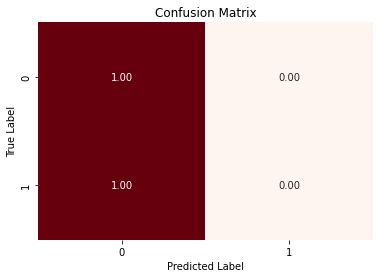

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Evaluate the model on the validation data
y_pred = model.predict(x_val)

y_pred_discrete = np.round(y_pred)

conf_mat = confusion_matrix(y_val, y_pred_discrete)

# Normalize the confusion matrix to get the ratios
conf_mat_norm = conf_mat / conf_mat.sum(axis=1, keepdims=True)

# Plot the normalized confusion matrix using Seaborn
sns.heatmap(conf_mat_norm, annot=True, fmt='.2f', cmap='Reds', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model_2nd = tf.keras.models.load_model('/content/drive/MyDrive/team_project/abdominal_model/dog/efficientNet_Ab06_224_32_0_0001_all_frz.h5')

In [ ]:
model_2nd.trainable = True
model_2nd.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                            

In [ ]:
len(model_2nd.layers)

240

In [ ]:
for layer in model_2nd.layers[:120]:
  layer.trainable = False

In [ ]:
model_2nd.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                            

In [ ]:
model = model_2nd

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# initialize wandb
import wandb

wandb.init(project='dog-Ab06-efficientNet-224')

In [ ]:
# Train the model using fit and the training Dataset:
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint

history = model.fit(train_dataset.repeat(), epochs=30, steps_per_epoch=len(x_train)//32, callbacks=[
                      WandbMetricsLogger(log_freq=5),
                      WandbModelCheckpoint("models")
                    ])

Epoch 1/30
236/236 [==============================] - ETA: 0s - loss: 0.0904 - accuracy: 0.9681

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 74s 266ms/step - loss: 0.0904 - accuracy: 0.9681
Epoch 2/30
236/236 [==============================] - ETA: 0s - loss: 0.0356 - accuracy: 0.9885

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 70s 295ms/step - loss: 0.0356 - accuracy: 0.9885
Epoch 3/30
236/236 [==============================] - ETA: 0s - loss: 0.0205 - accuracy: 0.9927

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 63s 269ms/step - loss: 0.0205 - accuracy: 0.9927
Epoch 4/30
236/236 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 0.9951

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 60s 257ms/step - loss: 0.0147 - accuracy: 0.9951
Epoch 5/30
236/236 [==============================] - ETA: 0s - loss: 0.0111 - accuracy: 0.9959

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 59s 250ms/step - loss: 0.0111 - accuracy: 0.9959
Epoch 6/30
236/236 [==============================] - ETA: 0s - loss: 0.0087 - accuracy: 0.9964

wandb: Adding directory to artifact (./models)... Done. 0.3s


236/236 [==============================] - 65s 276ms/step - loss: 0.0087 - accuracy: 0.9964
Epoch 7/30
236/236 [==============================] - ETA: 0s - loss: 0.0087 - accuracy: 0.9962

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 65s 275ms/step - loss: 0.0087 - accuracy: 0.9962
Epoch 8/30
236/236 [==============================] - ETA: 0s - loss: 0.0058 - accuracy: 0.9974

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 62s 262ms/step - loss: 0.0058 - accuracy: 0.9974
Epoch 9/30
236/236 [==============================] - ETA: 0s - loss: 0.0073 - accuracy: 0.9966

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 62s 261ms/step - loss: 0.0073 - accuracy: 0.9966
Epoch 10/30
236/236 [==============================] - ETA: 0s - loss: 0.0086 - accuracy: 0.9958

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 62s 265ms/step - loss: 0.0086 - accuracy: 0.9958
Epoch 11/30
236/236 [==============================] - ETA: 0s - loss: 0.0076 - accuracy: 0.9963

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 65s 274ms/step - loss: 0.0076 - accuracy: 0.9963
Epoch 12/30
236/236 [==============================] - ETA: 0s - loss: 0.0081 - accuracy: 0.9968

wandb: Adding directory to artifact (./models)... Done. 0.3s


236/236 [==============================] - 61s 257ms/step - loss: 0.0081 - accuracy: 0.9968
Epoch 13/30
236/236 [==============================] - ETA: 0s - loss: 0.0047 - accuracy: 0.9971

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 66s 279ms/step - loss: 0.0047 - accuracy: 0.9971
Epoch 14/30
236/236 [==============================] - ETA: 0s - loss: 0.0071 - accuracy: 0.9963

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 62s 263ms/step - loss: 0.0071 - accuracy: 0.9963
Epoch 15/30
236/236 [==============================] - ETA: 0s - loss: 0.0061 - accuracy: 0.9968

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 66s 281ms/step - loss: 0.0061 - accuracy: 0.9968
Epoch 16/30
236/236 [==============================] - ETA: 0s - loss: 0.0049 - accuracy: 0.9974

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 63s 269ms/step - loss: 0.0049 - accuracy: 0.9974
Epoch 17/30
236/236 [==============================] - ETA: 0s - loss: 0.0050 - accuracy: 0.9968

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 64s 271ms/step - loss: 0.0050 - accuracy: 0.9968
Epoch 18/30
236/236 [==============================] - ETA: 0s - loss: 0.0049 - accuracy: 0.9970

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 66s 278ms/step - loss: 0.0049 - accuracy: 0.9970
Epoch 19/30
236/236 [==============================] - ETA: 0s - loss: 0.0067 - accuracy: 0.9964

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 66s 278ms/step - loss: 0.0067 - accuracy: 0.9964
Epoch 20/30
236/236 [==============================] - ETA: 0s - loss: 0.0065 - accuracy: 0.9970

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 63s 267ms/step - loss: 0.0065 - accuracy: 0.9970
Epoch 21/30
236/236 [==============================] - ETA: 0s - loss: 0.0040 - accuracy: 0.9974

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 65s 276ms/step - loss: 0.0040 - accuracy: 0.9974
Epoch 22/30
236/236 [==============================] - ETA: 0s - loss: 0.0064 - accuracy: 0.9963

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 66s 282ms/step - loss: 0.0064 - accuracy: 0.9963
Epoch 23/30
236/236 [==============================] - ETA: 0s - loss: 0.0048 - accuracy: 0.9975

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 60s 254ms/step - loss: 0.0048 - accuracy: 0.9975
Epoch 24/30
236/236 [==============================] - ETA: 0s - loss: 0.0040 - accuracy: 0.9974

wandb: Adding directory to artifact (./models)... Done. 0.3s


236/236 [==============================] - 65s 274ms/step - loss: 0.0040 - accuracy: 0.9974
Epoch 25/30
236/236 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 0.9971

wandb: Adding directory to artifact (./models)... Done. 0.3s


236/236 [==============================] - 68s 290ms/step - loss: 0.0043 - accuracy: 0.9971
Epoch 26/30
236/236 [==============================] - ETA: 0s - loss: 0.0038 - accuracy: 0.9977

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 60s 255ms/step - loss: 0.0038 - accuracy: 0.9977
Epoch 27/30
236/236 [==============================] - ETA: 0s - loss: 0.0058 - accuracy: 0.9970

wandb: Adding directory to artifact (./models)... Done. 0.3s


236/236 [==============================] - 63s 269ms/step - loss: 0.0058 - accuracy: 0.9970
Epoch 28/30
236/236 [==============================] - ETA: 0s - loss: 0.0035 - accuracy: 0.9979

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 66s 278ms/step - loss: 0.0035 - accuracy: 0.9979
Epoch 29/30
236/236 [==============================] - ETA: 0s - loss: 0.0031 - accuracy: 0.9976

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 60s 256ms/step - loss: 0.0031 - accuracy: 0.9976
Epoch 30/30
236/236 [==============================] - ETA: 0s - loss: 0.0039 - accuracy: 0.9977

wandb: Adding directory to artifact (./models)... Done. 0.3s


236/236 [==============================] - 66s 281ms/step - loss: 0.0039 - accuracy: 0.9977


In [ ]:
# Evaluate the model on the test data

test_loss, test_acc = model.evaluate(x_test, y_test)
wandb.log({'Test Loss': test_loss, 'Test Accuracy': test_acc})


30/30 [==============================] - 5s 63ms/step - loss: 0.1624 - accuracy: 0.9831


In [ ]:
wandb.finish()

Test Accuracy,▁
Test Loss,▁
batch/accuracy,▁▅▇▇▇███████████████████████████████████
batch/batch_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
batch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch/loss,█▅▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/accuracy,▁▆▇▇██████████████████████████
epoch/epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▄▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Test Accuracy,0.98312


In [ ]:
model.save('/content/drive/MyDrive/team_project/abdominal_model/dog/efficientNet_Ab06_224_32_0_0001_half_frz.h5')

30/30 [==============================] - 4s 59ms/step


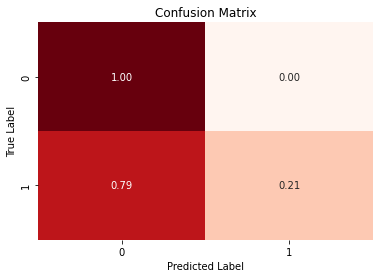

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Evaluate the model on the validation data
y_pred = model.predict(x_val)

y_pred_discrete = np.round(y_pred)

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_val, y_pred_discrete)

# Normalize the confusion matrix to get the ratios
conf_mat_norm = conf_mat / conf_mat.sum(axis=1, keepdims=True)

# Plot the normalized confusion matrix using Seaborn
sns.heatmap(conf_mat_norm, annot=True, fmt='.2f', cmap='Reds', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def efficientNet_zero_frz_model():
  base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False, weights = 'imagenet')
  base_model.trainable = True
  flat_layer = layers.GlobalAveragePooling2D()(base_model.output)
  output = layers.Dense(1, activation = 'sigmoid')(flat_layer)
  model = tf.keras.models.Model(base_model.input, output)
  return model


In [ ]:
model = efficientNet_zero_frz_model()

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_1 (Rescaling)        (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_1 (Normalization  (None, None, None,   7          ['rescaling_1[0][0]']            
 )                              3)                                                          

In [ ]:
# Compile the model using an optimizer, a loss function, and evaluation metrics

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# initialize wandb
import wandb

wandb.init(project='dog-Ab06-efficientNet-224')

In [ ]:
# Train the model using fit and the training Dataset:
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint

history = model.fit(train_dataset.repeat(), epochs=30, steps_per_epoch=len(x_train)//32, callbacks=[
                      WandbMetricsLogger(log_freq=5),
                      WandbModelCheckpoint("models")
                    ])

Epoch 1/30
  6/236 [..............................] - ETA: 1:09 - loss: 0.6688 - accuracy: 0.5365

236/236 [==============================] - ETA: 0s - loss: 0.0975 - accuracy: 0.9731

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 121s 453ms/step - loss: 0.0975 - accuracy: 0.9731
Epoch 2/30
236/236 [==============================] - ETA: 0s - loss: 0.0351 - accuracy: 0.9870

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 116s 490ms/step - loss: 0.0351 - accuracy: 0.9870
Epoch 3/30
236/236 [==============================] - ETA: 0s - loss: 0.0200 - accuracy: 0.9934

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 114s 483ms/step - loss: 0.0200 - accuracy: 0.9934
Epoch 4/30
236/236 [==============================] - ETA: 0s - loss: 0.0146 - accuracy: 0.9951

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 109s 464ms/step - loss: 0.0146 - accuracy: 0.9951
Epoch 5/30
236/236 [==============================] - ETA: 0s - loss: 0.0123 - accuracy: 0.9954

wandb: Adding directory to artifact (./models)... Done. 0.3s


236/236 [==============================] - 114s 481ms/step - loss: 0.0123 - accuracy: 0.9954
Epoch 6/30
236/236 [==============================] - ETA: 0s - loss: 0.0101 - accuracy: 0.9958

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 108s 459ms/step - loss: 0.0101 - accuracy: 0.9958
Epoch 7/30
236/236 [==============================] - ETA: 0s - loss: 0.0083 - accuracy: 0.9967

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 114s 483ms/step - loss: 0.0083 - accuracy: 0.9967
Epoch 8/30
236/236 [==============================] - ETA: 0s - loss: 0.0089 - accuracy: 0.9962

wandb: Adding directory to artifact (./models)... Done. 0.3s


236/236 [==============================] - 108s 459ms/step - loss: 0.0089 - accuracy: 0.9962
Epoch 9/30
236/236 [==============================] - ETA: 0s - loss: 0.0056 - accuracy: 0.9970

wandb: Adding directory to artifact (./models)... Done. 0.3s


236/236 [==============================] - 115s 487ms/step - loss: 0.0056 - accuracy: 0.9970
Epoch 10/30
236/236 [==============================] - ETA: 0s - loss: 0.0058 - accuracy: 0.9968

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 113s 479ms/step - loss: 0.0058 - accuracy: 0.9968
Epoch 11/30
236/236 [==============================] - ETA: 0s - loss: 0.0056 - accuracy: 0.9975

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 107s 454ms/step - loss: 0.0056 - accuracy: 0.9975
Epoch 12/30
236/236 [==============================] - ETA: 0s - loss: 0.0075 - accuracy: 0.9963

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 115s 486ms/step - loss: 0.0075 - accuracy: 0.9963
Epoch 13/30
236/236 [==============================] - ETA: 0s - loss: 0.0060 - accuracy: 0.9970

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 108s 457ms/step - loss: 0.0060 - accuracy: 0.9970
Epoch 14/30
236/236 [==============================] - ETA: 0s - loss: 0.0067 - accuracy: 0.9964

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 116s 492ms/step - loss: 0.0067 - accuracy: 0.9964
Epoch 15/30
236/236 [==============================] - ETA: 0s - loss: 0.0069 - accuracy: 0.9967

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 109s 462ms/step - loss: 0.0069 - accuracy: 0.9967
Epoch 16/30
236/236 [==============================] - ETA: 0s - loss: 0.0044 - accuracy: 0.9966

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 114s 485ms/step - loss: 0.0044 - accuracy: 0.9966
Epoch 17/30
236/236 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 0.9972

wandb: Adding directory to artifact (./models)... Done. 0.2s


236/236 [==============================] - 107s 455ms/step - loss: 0.0043 - accuracy: 0.9972
Epoch 18/30
236/236 [==============================] - ETA: 0s - loss: 0.0035 - accuracy: 0.9981

wandb: Adding directory to artifact (./models)... Done. 0.3s


236/236 [==============================] - 115s 487ms/step - loss: 0.0035 - accuracy: 0.9981
Epoch 19/30
236/236 [==============================] - ETA: 0s - loss: 0.0041 - accuracy: 0.9977

wandb: Adding directory to artifact (./models)... Done. 0.3s


236/236 [==============================] - 106s 451ms/step - loss: 0.0041 - accuracy: 0.9977
Epoch 20/30
 48/236 [=====>........................] - ETA: 57s - loss: 0.0024 - accuracy: 0.9993

In [ ]:
# Evaluate the model on the test data

test_loss, test_acc = model.evaluate(x_test, y_test)
wandb.log({'Test Loss': test_loss, 'Test Accuracy': test_acc})


In [ ]:
wandb.finish()

In [ ]:
model.save('/content/drive/MyDrive/team_project/abdominal_model/dog/efficientNet_Ab06_224_32_0_0001_zero_frz.h5')

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Evaluate the model on the validation data
y_pred = model.predict(x_val)

y_pred_discrete = np.round(y_pred)

conf_mat = confusion_matrix(y_val, y_pred_discrete)

# Normalize the confusion matrix to get the ratios
conf_mat_norm = conf_mat / conf_mat.sum(axis=1, keepdims=True)

# Plot the normalized confusion matrix using Seaborn
sns.heatmap(conf_mat_norm, annot=True, fmt='.2f', cmap='Reds', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()